In [1]:
import sqlite3

# Connect to a new database file (or existing one)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [3]:
# Insert sample sales data
sample_data = [
    ('Apple', 10, 2.0),
    ('Banana', 15, 1.0),
    ('Apple', 5, 2.0),
    ('Orange', 8, 1.5),
    ('Banana', 10, 1.0),
    ('Orange', 12, 1.5),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("sales_data.db")


In [7]:
# Run SQL query to get sales summary
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [9]:
# Close the connection
conn.close()


In [11]:
# Display data in console
print("Sales Summary:")
print(df)


Sales Summary:
  product  total_qty  revenue
0   Apple         15     30.0
1  Banana         25     25.0
2  Orange         20     30.0


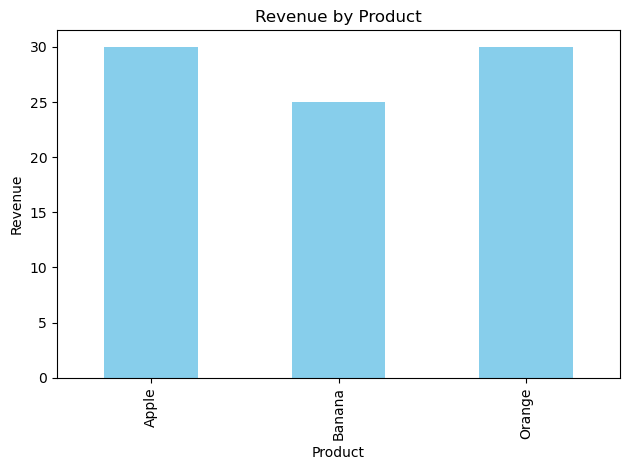

In [13]:
# Plot bar chart for revenue
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()


In [15]:
# Optional: Save chart to file
plt.savefig("sales_chart.png")

# Show the chart
plt.show()

<Figure size 640x480 with 0 Axes>